In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("dataset/newTrainingDataset.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [15]:
print(df.iloc[:,3].describe())

count    11055.000000
mean         0.738761
std          0.673998
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Shortining_Service, dtype: float64


In [3]:
df.shape

(11055, 32)

In [4]:
X=df.iloc[:,1:31]
y=df.iloc[:,31]
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [5]:
X

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [6]:
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [21]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components=28)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

<AxesSubplot:>

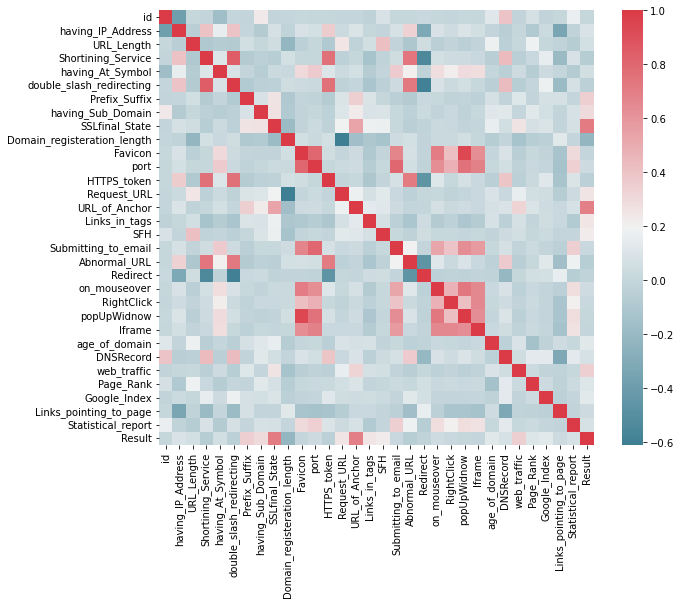

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Minimum error: 0.046585255540479424 at K = 0


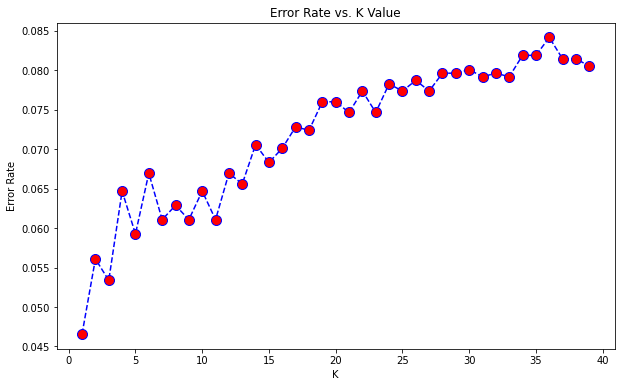

In [9]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.score(X_test, y_test)

0.9466304839439168

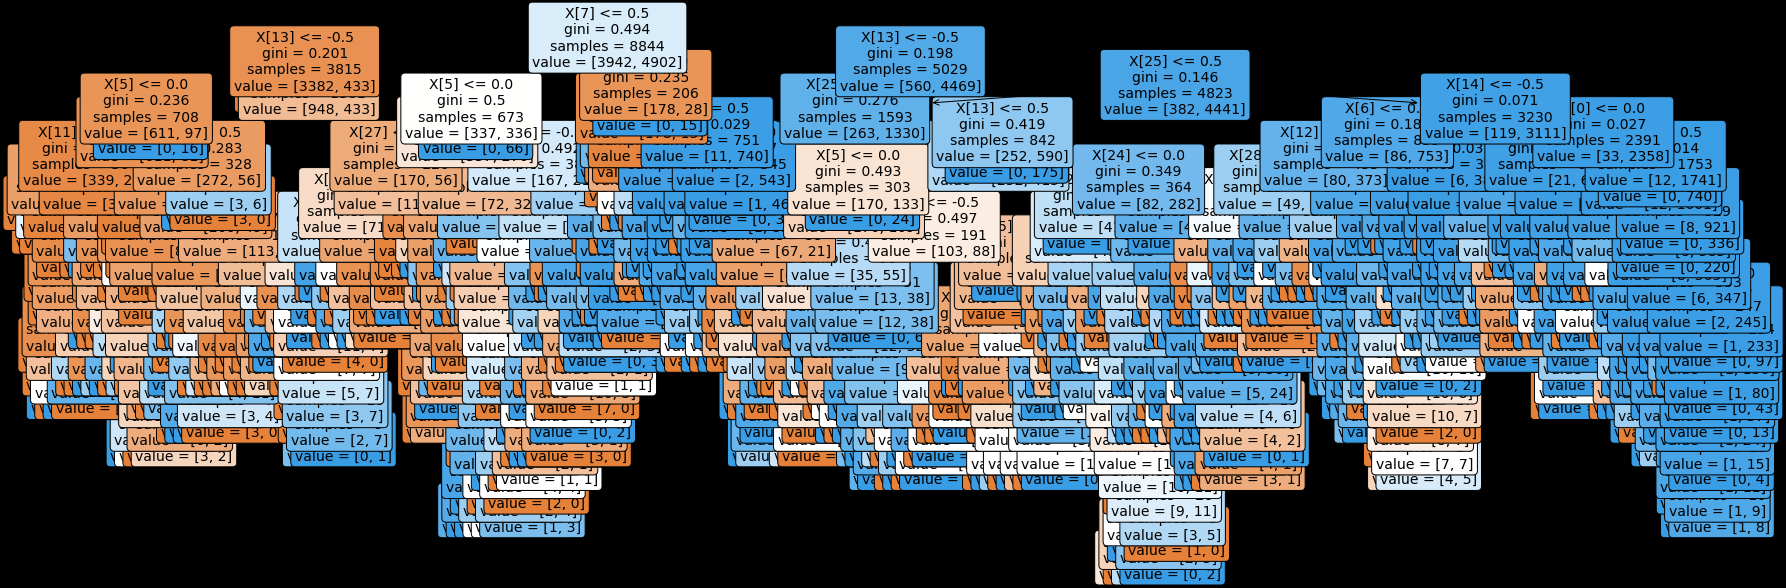

In [12]:
clf = DecisionTreeClassifier(max_depth =None, random_state = 42)
clf.fit(X_train, y_train)
plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,
    rounded = True,
    filled = True,
    fontsize=14)
plt.show()

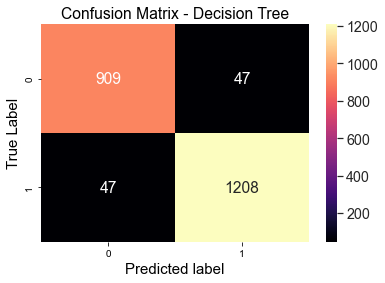

<Figure size 720x504 with 0 Axes>

0.9574853007688828


In [13]:
test_pred_decision_tree = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test,test_pred_decision_tree))

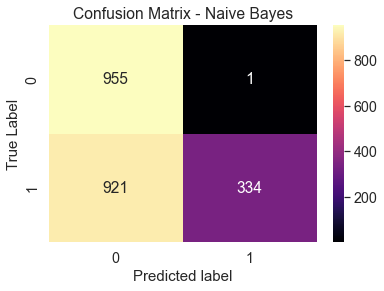

<Figure size 720x504 with 0 Axes>

0.5829941203075532


In [14]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Naive Bayes')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)